In [1]:
import pymangle
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib import pyplot as plt

In [2]:
def spherical_caps_vector(ra, dec, theta, reverse=False):
    """
    Transform the (ra, dec, theta) into (x, y, z, 1-h) for spherical cap vector
    :param reverse: default is False, control reverse of 1-h
    :param ra: ra angle which represents spherical cap (degree)
    :param dec: dec angle which represents spherical cap (degree)
    :param theta: radius on the surface of the unit sphere (degree)
    :return: vector that represents the spherical cap in (x, y, z, 1-h)
    """

    c = SkyCoord(ra, dec).cartesian
    
    if reverse:
        return [c.x.value, c.y.value, c.z.value, -(1.-np.cos(theta)).value]
    
    return [c.x.value, c.y.value, c.z.value, (1.-np.cos(theta)).value]

In [26]:
def create_mangle_ply(filename, polygons):
    """
    Create ply file for given caps info with weight and area
    :param filename: name for the created mangle file
    :param polygons: caps info
    """
    with open(filename, 'w') as f:
        f.write(f"{len(polygons)} polygons\n")
        for i, (weight, area, caps) in enumerate(polygons):
            f.write(f"polygon {i+1} ( {len(caps)} caps, {weight} weight, 0 pixle, {area} str):\n")
            for cap in caps:
                f.write(f"{' '.join(list(map(str, cap)))}\n")

In [27]:
area = (np.sin(40*u.deg) - np.sin(30*u.deg))*(15*u.deg.to('radian'))

In [28]:
polygons = [(
        1, area, [spherical_caps_vector(0*u.deg, 90*u.deg, 60*u.deg), 
        spherical_caps_vector(0*u.deg, 90*u.deg, 50*u.deg, True),
        spherical_caps_vector(165*u.deg, 0*u.deg, 90*u.deg),
        spherical_caps_vector(180*u.deg, 0*u.deg, 90*u.deg, True)]
)]
create_mangle_ply("lat_lon.ply", polygons)

In [48]:
m_lat_lon = pymangle.Mangle("lat_lon.ply")
ra, dec = m_lat_lon.genrand(10000)

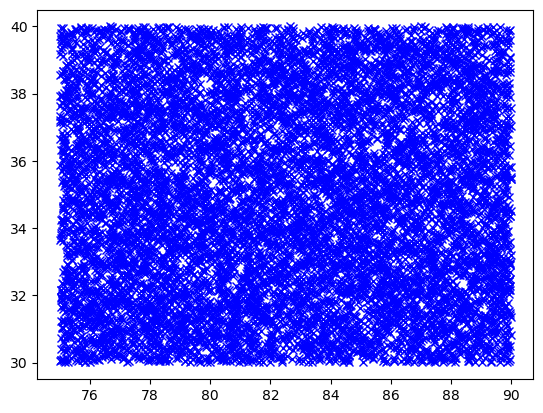

In [31]:
plt.plot(ra, dec, 'bx')

In [32]:
area = (np.sin(70*u.deg) - np.sin(60*u.deg))*(15*u.deg.to('radian'))

In [33]:
polygons = [(
        1, area, [spherical_caps_vector(0*u.deg, 90*u.deg, 30*u.deg), 
        spherical_caps_vector(0*u.deg, 90*u.deg, 20*u.deg, True),
        spherical_caps_vector(255*u.deg, 0*u.deg, 90*u.deg),
        spherical_caps_vector(270*u.deg, 0*u.deg, 90*u.deg, True)]
)]
create_mangle_ply("lat_lon2.ply", polygons)

In [34]:
m_lat_lon2 = pymangle.Mangle("lat_lon2.ply")
ra, dec = m_lat_lon2.genrand(10000)

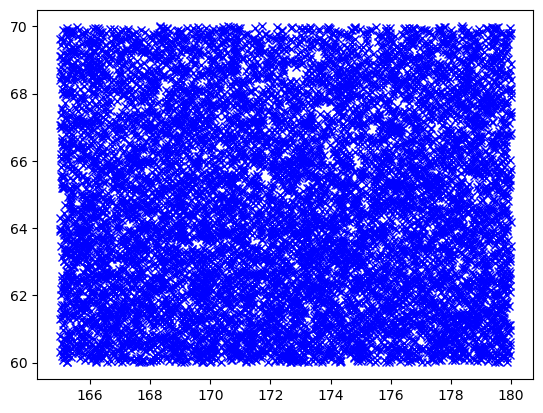

In [35]:
plt.plot(ra, dec, 'bx')

In [71]:
ra = 360.*np.random.random(100000)
dec = (180./np.pi)*np.arcsin(1.-np.random.random(100000)*2)

In [73]:
inside_m = m_lat_lon.contains(ra, dec)

TypeError: data type 'f16' not understood

In [78]:
ra = np.array(ra, ndmin=1, dtype='f64', copy=False, order='C')

TypeError: data type 'f64' not understood

## This is really annoying since I am using my laptop to do the coding (apple silicon arm chip), seems there is a compatibility issue which does not support 'f16'. I should go to their source code to change this to np.float16 to make it work. This is silly since it does not even happen at the C based code, it happens at the python wrapper. I don't know why they made this decision. Terrible!

## Anyway, I know how to do the rest of the problems!